<a href="https://colab.research.google.com/github/ds330wkguys/project_code/blob/main/FLAML_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **FLAML AutoML Time Series Forecasting Model**

# **Installation**

In [1]:
!pip install "flaml[ts_forecast]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 11.1 MB/s 
     |████████████████████████████████| 2.0 MB 60.4 MB/s 
     |████████████████████████████████| 786 kB 74.8 MB/s 
     |████████████████████████████████| 172 kB 9.2 MB/s 
     |████████████████████████████████| 208 kB 67.2 MB/s 
     |████████████████████████████████| 8.9 MB 31.0 MB/s 
     |████████████████████████████████| 74 kB 1.6 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3
  Attempting uninstall: holidays
    Found existing installation: holidays 0.17
    Uninstalling holidays-0.17:
      Successfully uninstalled holidays-0.17
  Attempting uninstall: prophet
    Found existing installation: prophet 1.1.1
    Uninstalling prophet-1.1.1:
      Successfully uninstalled prophet-1.1.1


# **Loading Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd


df_NVDA = pd.read_csv("/content/drive/MyDrive/2022 fall DS440/data/NVDA_merged.csv")    # Read csv from the directory

# Make sure there is no missing dates
#df_NVDA['Date'] = pd.to_datetime(df_NVDA['Date'])
#df_NVDA = df_NVDA.set_index('Date')    # Changing index for Filling values

#df_NVDA = df_NVDA.resample('D').first()    # Resampling & Assigning values
#df_NVDA = df_NVDA.bfill().ffill()

#df_NVDA.reset_index(inplace=True)    # Resetting the index after filling values

df_NVDA.head(10)

,Date,MarketCap,EnterpriseValue,PeRatio,sentimental,Price
0,2021-09-22,5.179000e+11,5.110370e+11,74.118,0.190943,219.410004
1,2021-09-23,5.179000e+11,5.110370e+11,74.118,0.113162,224.820007
2,2021-09-24,5.179000e+11,5.110370e+11,74.118,0.123634,220.809998
3,2021-09-25,5.179000e+11,5.110370e+11,74.118,0.125748,219.406667
4,2021-09-26,5.179000e+11,5.110370e+11,74.118,0.124486,218.003337
5,2021-09-27,5.179000e+11,5.110370e+11,74.118,0.131136,216.600006
6,2021-09-28,5.179000e+11,5.110370e+11,74.118,0.137007,206.990005
7,2021-09-29,5.179000e+11,5.110370e+11,74.118,0.125239,205.169998
8,2021-09-30,5.179000e+11,5.110370e+11,74.118,0.151043,207.160004
9,2021-10-01,6.391750e+11,6.323120e+11,87.407,0.110076,207.419998


# **Splitting Data**

In [38]:
num_samples = df_NVDA.shape[0]

time_horizon = 50
split_idx = num_samples - time_horizon
# df_TSLA = df_TSLA[:split_idx]  # train_df is a dataframe with two columns: timestamp and label
x_test = df_NVDA.iloc[split_idx:,0:5]
y_test = df_NVDA[split_idx:]['Price']

train_NVDA = df_NVDA.iloc[:split_idx]
train_NVDA2 = train_NVDA.drop(['MarketCap', 'EnterpriseValue', 'PeRatio', 'sentimental'], axis = 1)
train_NVDA2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    292 non-null    object 
 1   Price   292 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB


In [48]:
train_NVDA2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    292 non-null    datetime64[ns]
 1   Price   292 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [47]:
train_NVDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             292 non-null    datetime64[ns]
 1   MarketCap        292 non-null    float64       
 2   EnterpriseValue  292 non-null    float64       
 3   PeRatio          292 non-null    float64       
 4   sentimental      292 non-null    float64       
 5   Price            292 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 13.8 KB


# **Building a Time Series Model**

In [44]:
from flaml import AutoML

train_NVDA["Date"] = pd.to_datetime(train_NVDA["Date"])


automl = AutoML()
settings = {
    "time_budget": 60,
    "metric": 'mape',
    "task": 'ts_forecast',
    'log_file_name': 'Stock_Price.log',
    'eval_method': 'auto',
    'seed': 636362
}
automl.fit(dataframe = train_NVDA2,label = 'Price', **settings, period = 1)

[flaml.automl: 12-04 22:56:03] {2599} INFO - task = ts_forecast
INFO:flaml.automl:task = ts_forecast
[flaml.automl: 12-04 22:56:03] {2601} INFO - Data split method: time
INFO:flaml.automl:Data split method: time
[flaml.automl: 12-04 22:56:03] {2604} INFO - Evaluation method: cv
INFO:flaml.automl:Evaluation method: cv
[flaml.automl: 12-04 22:56:03] {2726} INFO - Minimizing error metric: mape
INFO:flaml.automl:Minimizing error metric: mape
[flaml.automl: 12-04 22:56:03] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'prophet', 'arima', 'sarimax']
INFO:flaml.automl:List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'prophet', 'arima', 'sarimax']
[flaml.automl: 12-04 22:56:03] {3166} INFO - iteration 0, current learner lgbm
INFO:flaml.automl:iteration 0, current learner lgbm
[flaml.automl: 12-04 22:56:03] {3296} INFO - Estimated sufficient time budget=919s. Estimated necessary time budget=

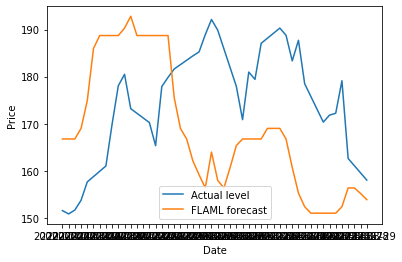

In [45]:
y_pred = automl.predict(x_test)    # Prediction using the model

import matplotlib.pyplot as plt

plt.plot(x_test2.Date, y_test, label='Actual level')
plt.plot(x_test.Date, y_pred, label='FLAML forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()